# 图像美化


- 案例1：直方图
    - 本质：为了统计每个像素灰度出现的概率
    - 横坐标：0-255灰度等级
    - 纵坐标：每个颜色等级对应的出现的概率(p)，取值范围[0,1]
    
- 案例2：直方图均衡化
    - 原理：
        - 让原本聚集在一起的直方图，离散化
    - 目的：
        - 优化亮度，清晰度
        
- 案例3：图片修复

- 案例4：亮度增强
    - 每个颜色等级 +/* 固定系数
    
- 案例5：磨皮美白
    - 双边滤波器
    
- 案例6：图片滤波
    - 高斯滤波
    - 中值滤波
    - 均值滤波

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./eunha.jpg",1)
height = image.shape[0]
width = image.shape[1]

 # 1. 彩色图片直方图
 
 - 计算图片直方图API：
     - cv2.calcHist()
         - 参数1：图片数据，中括号
         - 参数2：用于计算直方图的通道，中括号。[0]使用灰度计算直方图，所以是第一个通道
         - 参数3：mask模板，由于用不到，所以None
         - 参数4：histSize，表示这个直方图分成多少份（即多少个直方柱）。0-255，256份灰度值
         - 参数5：直方图中各个像素的值，[0.0, 256.0]表示直方图能表示像素值从0.0到256的像素
         - 返回值：像素点的数量

In [10]:
def ImageHistogram(image, type):
    """显示每张图片的每个通道的颜色直方图，type为B/G/R每个通道"""
    # 初始化
    color = (255,255,255)    # 把当前的颜色设置成白色
    windowName = "gray"      # 窗口名称
    
    # 判断当前type类型：
    if type == 0:                         # 当前为【蓝色】通道    
        color = (255,0,0)                 # 把当前颜色设置成蓝色
        windowName = "Blue Histogram"     # 窗口名称：蓝色的直方图
    
    elif type == 1:                       # 当前为【绿色】通道
        color = (0,255,0)                 # 把当前颜色设置成绿色
        windowName = "Green Histogram"    # 窗口名称：绿色的直方图
        
    elif type == 2:                       # 当前为【红色】通道
        color = (0,0,255)                 # 把当前颜色设置成红色
        windowName = "Red Histogram"      # 窗口名称：红色的直方图    
    
    # 计算图片的直方图，返回每个灰度等级对应的像素数量
    hist = cv2.calcHist([image],[0],None,[256],[0.0,255.0])
    
    # 获取最大/小的值和下标，为了归一化
    minV,maxV,minL,maxL = cv2.minMaxLoc(hist)
    
    # 创建画布
    histImage = np.zeros([256,256,3], np.uint8)
    
    # 绘制直方图
    for unit in range(256):    # 遍历每个单位的颜色等级
        histNormal = int(hist[unit]*256/maxV)    # 归一化像素数量，到[0-256]
        cv2.line(histImage, (unit,256), (unit,256-histNormal), color)    # 坐标轴原点：左上角，y轴从上到下递增
#         cv2.line(histImage, (unit,0), (unit,256-histNormal), color)

        
    cv2.imshow(windowName, histImage)
    return histImage



# 通过split方法，完成图像的分解：将图像的BGR分解成B/G/R三个颜色通道，返回每个通道的颜色值
channel = cv2.split(image)

# 遍历3种颜色通道：
for i in range(3):
    ImageHistogram(channel[i], i)
    
    
cv2.waitKey(5000)
cv2.destroyAllWindows()

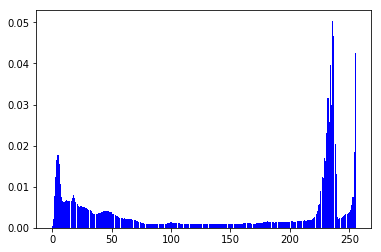

In [4]:
# 灰度直方图源码：
# 统计每个灰度等级出现的数量：灰度出现的数量 / (height*width)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
count = np.zeros((256), np.float)     # 统计每个灰度等级出现的数量

for i in range(0, height):
    for j in range(0, width):
        pixel = int(gray[i,j])             # 返回0-255等级
        count[pixel] = count[pixel] + 1    # 返回0-255等级对应的数量

for x in range(0, 256): # 分母是所有像素的总个数
    count[x] = count[x]/(height*width)    # 每个灰度等级，出现的概率

x = np.linspace(0,255,256)
y = count
plt.bar(x,y,0.9,alpha=1,color="b")   # 0.9：每一个bar所占的百分比90%
plt.show()

cv2.waitKey(5000)
cv2.destroyAllWindows()

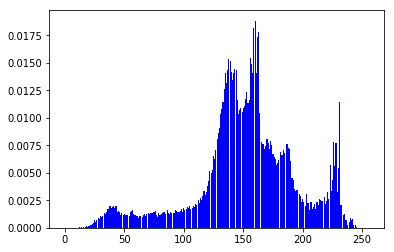

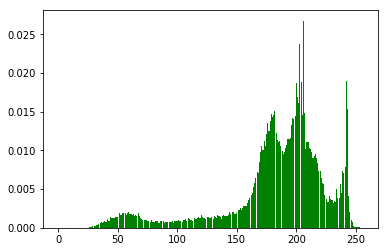

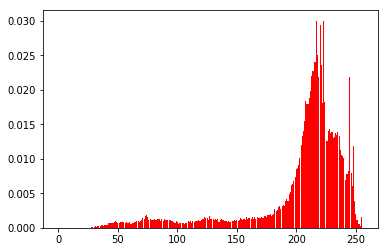

In [4]:
# 彩色直方图源码：

img = cv2.imread("./color_pic_histogram.jpg", 1)
h = img.shape[0]
w = img.shape[1]

count_blue = np.zeros(256, np.float)
count_green = np.zeros(256, np.float)
count_red = np.zeros(256, np.float)

for i in range(0, h):
    for j in range(0, w):
#         pixel_blue = int(cv2.split(img)[0])
#         pixel_green = int(cv2.split(img)[1])
#         pixel_red = int(cv2.split(img)[2])
        b,g,r = img[i,j]
        pixel_blue = int(b)
        pixel_green = int(g)
        pixel_red = int(r)
        
        count_blue[pixel_blue] = count_blue[pixel_blue] + 1
        count_green[pixel_green] = count_green[pixel_green] + 1
        count_red[pixel_red] = count_red[pixel_red] + 1

for x in range(0, 256):
    count_blue[x] = count_blue[x] / (h*w)
    count_green[x] = count_green[x] / (h*w)
    count_red[x] = count_red[x] / (h*w)


x = np.linspace(0,255,256)    # 从0开始，到255结束，总共有256个

y_b = count_blue
plt.figure()
plt.bar(x,y_b,0.9,alpha=1,color="b")

y_g = count_green
plt.figure()
plt.bar(x,y_g,0.9,alpha=1,color="g")

y_r = count_red
plt.figure()
plt.bar(x,y_r,0.9,alpha=1,color="r")

plt.show()

cv2.waitKey(5000)
cv2.destroyAllWindows()

# 2. 直方图均衡化

## 原理：
    
- 累计概率
    - 灰度等级：1    出现的概率：0.2    累计概率：0.2
    - 灰度等级：2    出现的概率：0.3    累计概率：0.5
    - 灰度等级：3    出现的概率：0.1    累计概率：0.6
    
-  颜色映射
    - 灰度等级：100    累计概率：0.5
    - 255*0.5 = 127.5就是灰度等级100的映射
        - 以后但凡出现100，都用127.5来替代，替代的过程就是**直方图均衡化**

## 2.1 灰度图像 - 直方图均衡化

- 比原始图像更加亮

- API：
    - cv2.equalizeHist(gray)
    

## 2.1 彩色图像 - 直方图均衡化
- API：
    - 必须要对单通道进行处理
    - cv2.equalizeHist(gray)
    - 将三个通道合成在一起
    - cv2.merge()
  

In [22]:
# 2.1 单通道直方图均衡化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dst_gray = cv2.equalizeHist(gray)

# 2.2 三通道直方图均衡化
(b,r,g) = cv2.split(image)                    # 通道分解

bHist = cv2.equalizeHist(b)    
gHist = cv2.equalizeHist(g)
rHist = cv2.equalizeHist(r)

dst_src = cv2.merge((bHist, gHist, rHist))    # 通道合成


# YUV 直方图均衡化
imgYUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
channelYUV = cv2.split(imgYUV)                # 通道分解

channelYUV[0] = cv2.equalizeHist(channelYUV[0])
channelYUV[1] = cv2.equalizeHist(channelYUV[1])
channelYUV[2] = cv2.equalizeHist(channelYUV[2])
channels = cv2.merge(channelYUV)
dst_YUV = cv2.cvtColor(channels, cv2.COLOR_YUV2BGR)    # 转换色彩空间，显示


cv2.imshow("src", image) # 彩色图片
cv2.imshow("gray", gray) # 灰度图片
cv2.imshow("gray_equalizeHist", dst_gray)    # 单通道直方图均衡化
cv2.imshow("src_equalizeHist", dst_src)    # 三通道直方图均衡化
cv2.imshow("src_YUV", dst_YUV)    # 三通道直方图均衡化

cv2.waitKey(5000)
cv2.destroyAllWindows()

### 2.3 灰度直方图均衡化源码


- 概率P --> 累计概率P
- 映射
    - newP = 255*p
    
- 遍历更新图像中的每一个像素，已达到直方图均衡化

In [8]:
# 灰度直方图源码：
# 统计每个灰度等级出现的数量：灰度出现的数量 / (height*width)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
count = np.zeros((256), np.float)     # 统计每个灰度等级出现的数量

for i in range(0, height):
    for j in range(0, width):
        pixel = int(gray[i,j])             # 返回0-255等级
        count[pixel] = count[pixel] + 1    # 返回0-255等级对应的数量
        
for x in range(0, 256): # 分母是所有像素的总个数
    count[x] = count[x] / (height*width)    # 每个灰度等级，出现的概率

    
# 计算累计概率：
sum_g = float(0)    # 初始化累计概率
for i in range(256):
    sum_g = sum_g + count[i]
    count[i] = sum_g    # 累计概率

# 计算映射表
map_g = np.zeros(256, np.uint8)
for i in range(256):
    map[i] = count[i] * 255
    
# 映射
for i in range(0, height):
    for j in range(0, width):
        pixel = gray[i,j]
        gray[i,j] = map_g[pixel]


cv2.imshow("gray_equalizeHist", gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

### 2.4 彩色直方图源码：

In [21]:
count_b = np.zeros(256, np.float32)
count_g = np.zeros(256, np.float32)
count_r = np.zeros(256, np.float32)


for i in range(0, height):
    for j in range(0, width):
        (b,g,r) = image[i,j]
        b = int(b)
        g = int(g)
        r = int(r)
        count_b[b] = count_b[b] + 1
        count_g[g] = count_g[g] + 1
        count_r[r] = count_r[r] + 1

for x in range(256):
    count_b[x] = count_b[x]/(height*width)
    count_g[x] = count_g[x]/(height*width)
    count_r[x] = count_r[x]/(height*width)

# 计算累计概率
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)

for p in range(256):
    sum_b += count_b[p]
    count_b[p] = sum_b
    
    sum_g += count_g[p]
    count_g[p] = sum_g
    
    sum_r += count_r[p]
    count_r[p] = sum_r


# 计算映射表
map_b = np.zeros(256, np.uint16)
map_g = np.zeros(256, np.uint16)
map_r = np.zeros(256, np.uint16)

for m in range(256):
    map_b[m] = count_b[m]*255
    map_g[m] = count_g[m]*255
    map_r[m] = count_r[m]*255

dst_map = np.zeros((height,width,3), np.uint8)

# 映射
for i in range(0, height):
    for j in range(0, width):
        (b,g,r) = image[i,j]
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst_map[i,j] = (b,g,r)

cv2.imshow("image", dst_map)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# 3. 图片修补

- 针对已损坏的图片
    - 使用代码编写一个坏的图片

- 使用图片修补的方式，去掉损坏的部分

- 修补已损坏的图片的步骤：
    1. 坏图
    2. 一个描绘坏图中，哪一部分损坏的数组
    3. 使用cv2.inpaint方法，完成图片修补
        - 参数1：坏图
        - 参数2：根据坏的数据，生成的一维度数组

In [11]:
# 创建损坏图片
damage_img = image.copy()

for i in range(200,300):
    damage_img[i, 200] = (255,255,255)
    damage_img[i, 200-1] = (255,255,255)
    damage_img[i, 200+1] = (255,255,255)

for j in range(150,250):
    damage_img[250,j] = (255,255,255)
    damage_img[250-1,j] = (255,255,255)
    damage_img[250+1,j] = (255,255,255)

cv2.imwrite("./damaged.jpg", damage_img)
cv2.imshow("damaged image", damage_img)

cv2.waitKey(5000)
cv2.destroyAllWindows()

In [13]:
# 修补已损坏的图片：

damage_img = cv2.imread("./damaged.jpg", 1)
height = damage_img.shape[0]
width = damage_img.shape[1]
paint = np.zeros((height,width,1), np.uint8)    # 新建画布，在画布中保存已损坏的像素

# 描绘坏图中，哪一部分损坏的数组
for i in range(200,300):
    paint[i, 200] = 255
    paint[i, 200-1] = 255
    paint[i, 200+1] = 255

for j in range(150,250):
    paint[250,j] = 255
    paint[250-1,j] = 255
    paint[250+1,j] = 255
    
dst_repair = cv2.inpaint(damage_img, paint, 3, cv2.INPAINT_TELEA)

cv2.imshow("src", image)
cv2.imshow("damaged", damage_img)
cv2.imshow("paint", paint)
cv2.imshow("repair", dst_repair)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# 4. 亮度增强

- 公式：
    - newP = pixel + 固定的值
    - newP = pixel* 固定的值 + 固定的值
    - 最简单的美白算法

In [28]:
# newP = pixel + 固定的值

dst_light = np.zeros((height,width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b,g,r) = image[i,j]
        new_b = int(b) + 40
        new_g = int(g) + 40
        new_r = int(r) + 40
        new_b = np.where(new_b > 255, 255, new_b)
        new_g = np.where(new_g > 255, 255, new_g)
        new_r = np.where(new_r > 255, 255, new_r)
        dst_light[i,j] = (new_b, new_g, new_r)

cv2.imshow("src", image)
cv2.imshow("light", dst_light)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [30]:
# newP = pixel* 固定的值 + 固定的值

dst_light = np.zeros((height,width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b,g,r) = image[i,j]
        new_b = int(b*1.3) + 10
        new_g = int(g*1.2) + 15
#         new_r = int(r) + 40
        new_b = np.where(new_b > 255, 255, new_b)
        new_g = np.where(new_g > 255, 255, new_g)
#         new_r = np.where(new_r > 255, 255, r)
        dst_light[i,j] = (new_b, new_g, r)

cv2.imshow("src", image)
cv2.imshow("light", dst_light)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# 5. 磨皮美白

像素与滤波核的乘法再相加，就是卷积运算

## 双边滤波API：

- 高斯核 + r距离核 = 一个新的核
    - 用新的核与像素进行卷积
    - 得到新的像素（就是进过双边滤波之后的图像）
- cv2.bilateralFilter()
    - 参数1：输入的图像数据 
        
    - 参数2：d
        - 表示在过滤过程中每个像素邻域的直径范围，直径内的像数都会被纳入计算。
            - 如果这个值是非正数(-1)，会从后面的参数sigmaSpace中自动计算该值。
            - 如果设定值大于5，那计算会很慢，所以一般设置都等于5，如果少数情况需要去除比较大的噪声，那么d=9。
            - 当d>0时，d指定了邻域大小且与sigmaSpace无关，否则d正比于sigmaSpace. 
         
        - 参数3：double sigmaColor：算图像的颜色
            - 颜色空间过滤器的sigma值，这个参数的值越大，表明该像素邻域内有越宽广的颜色会被混合到一起，产生较大的半相等颜色区域。 
      
    - 参数4：double sigmaSpace：空间偏移量
        - 坐标空间中滤波器的sigma值，如果该值较大，则意味着颜色相近的较远的像素将相互影响，从而使更大的区域中足够相似的颜色获取相同的颜色
    - 参数5： dst=None
        - 输出图片的尺寸与输入图片一致

    - 参数6：borderType=None
        - 用于推断图像外部像素的某种边界模式，有默认值BORDER_DEFAULT.

    - 返回过滤后的图片

- tips：
    - - 对于简单的滤波而言，可以将两个sigma值设置成相同的值，如果值<10，则对滤波器影响很小，如果值>150则会对滤波器产生较大的影响，会使图片看起来像卡通。


- 缺点：
    - 双边滤波器可以很好的保存图像边缘细节而滤除掉低频分量的噪音，但是双边滤波器的效率不是太高，花费的时间相较于其他滤波器而言也比较长。 

In [31]:
dst = cv2.bilateralFilter(image,15,35,35)

cv2.imshow("src", image)
cv2.imshow("dst", dst)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# 6. 高斯均值滤波

- 高斯核：
    - 3x3的滤波核
    - 滤波核越往中间，值越大；反之。越小
    - 与图像的3x3区域进行卷积运算
        - 实质：矩阵对应点相乘并求和
        - 最后，再除以滤波核数值的和
    - 


In [8]:
# 椒盐噪声
img_sn = cv2.imread("./salt_noisy.jpeg",1)
cv2.imshow("src", img_sn)

dst_gb = cv2.GaussianBlur(img_sn, (5,5), 1.5)
cv2.imshow("dst_GaussianBlur", dst_gb)

cv2.waitKey(5000)
cv2.destroyAllWindows()

# 7. 均值滤波
滤波核与图形进行卷积运算

In [10]:
height = img_sn.shape[0]
width = img_sn.shape[1]
dst = np.zeros((height, width,3), np.uint8)

for i in range(3,height-3):
    for j in range(3,width-3):
        sum_b = np.int(0)
        sum_g = np.int(0)
        sum_r = np.int(0)
        for m in range(-3,3):    # 滤波核：6x6
            for n in range(-3,3):
                (b,g,r) = img_sn[i+m, j+n]
                sum_b = sum_b + int(b)
                sum_g = sum_g + int(g)
                sum_r = sum_r + int(r)
                
        b = np.uint8(sum_b / 36)    # 每个6x6矩阵的均值
        g = np.uint8(sum_g / 36)
        r = np.uint8(sum_r / 36)
        dst[i,j] = (b,g,r)

cv2.imshow("dst_GaussianBlur", dst_gb)
cv2.imshow("dst_MeanBlur", dst)
cv2.waitKey(5000)
cv2.destroyAllWindows()    

# 中值滤波

- 用中间的值过滤
    - 先在数组中排序，然后获取中间值
    - 定义一个3x3的中值滤波核，
    - 过滤后，使用排序算法，寻找到第四个值（中值）

In [20]:
gray = cv2.cvtColor(img_sn, cv2.COLOR_BGR2GRAY)
dst_median = np.zeros((height,width), np.uint8)
collect = np.zeros(9, np.uint8)

for i in range(1, height-2):
    for j in range(1, width-2):
        k = 0    # 数组排列的下标
        for m in range(-1,2):
            for n in range(-1,2):
                collect[k] = gray[i,j]    # 将3x3的灰度值，保存到数组，用于排序取中值
                k = k + 1    # 更新下标
        mid = quick_sort(collect,0,len(collect)-1)
        dst_median[i,j] = mid
        
cv2.imshow("dst_MedianBlur", dst_median)
cv2.waitKey(5000)
cv2.destroyAllWindows()  

In [18]:
def quick_sort(li, start, end):
    if start >= end:
        return None
    mid = li[start]
    left = start
    right = end
    
    while left < right:
        while left < right and li[right] >= mid:
            right -= 1
        li[left] = li[right]
        while left < right and li[left] < mid:
            left += 1
        li[right] = li[left]
    
    li[left] = mid
    quick_sort(li, start, left-1)
    quick_sort(li, left+1, end)
    
    mid_index = len(li)//2
    mid = li[mid_index]
    return mid

5